<a href="https://colab.research.google.com/github/rgsalcedo/TLDeconvolutionToolkit/blob/main/DeCurBrillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.special import wofz
from scipy.optimize import curve_fit, minimize


In [ ]:
# Datos de temperatura y X-ray (intensidad)
temperature = np.array([
    50, 52, 54, 55, 57, 58, 60, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 78, 79, 81, 82, 83, 85, 86, 88, 89, 91, 92,
    94, 96, 97, 99, 100, 102, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 120, 121, 123, 124, 125, 127, 128,
    130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 154, 155, 157, 158, 160, 162, 163,
    165, 166, 167, 169, 170, 172, 174, 175, 176, 178, 180, 181, 183, 184, 186, 187, 188, 190, 191, 193, 194, 196, 197,
    199, 201, 202, 204, 205, 207, 208, 210, 211, 212, 214, 216, 217, 219, 220, 222, 223, 225, 226, 228, 229, 230, 232,
    234, 235, 237, 238, 240, 241, 243, 244, 246, 247, 249, 250, 252, 253, 254, 256, 258, 259, 261, 262, 264, 265, 267,
    268, 270, 271, 272, 274, 276, 277, 279, 280, 282, 283, 285, 286, 288, 289, 291, 292, 293, 295, 297, 298, 299, 301,
    303, 304, 306, 307, 309, 310, 312, 313, 315, 316, 318, 319, 321, 322, 324, 325, 327, 328, 330, 332, 333, 334, 336,
    337, 339, 340, 342, 343, 345, 346, 348, 349
], dtype=float)

xray = np.array([
    64, 90, 50, 86, 72, 132, 70, 50, 214, 248, 96, 214, 237, 255, 262, 318, 322, 478, 466, 562, 544, 694, 896, 1038, 1226,
    1428, 1573, 1763, 1932, 2086, 2734, 2954, 3493, 4121, 4830, 5146, 6055, 7269, 8386, 9312, 10718, 12404, 14376, 16106,
    18188, 21122, 24919, 27049, 31310, 34180, 38254, 42000, 46396, 51708, 56326, 61856, 67322, 74196, 79787, 86965, 95572,
    102976, 112431, 120055, 129780, 141068, 149620, 160164, 170316, 182263, 194485, 206098, 216462, 229390, 238316, 252155,
    259929, 272989, 281215, 296617, 301703, 312200, 318628, 325972, 332386, 336336, 341392, 347396, 350983, 352889, 356326,
    357222, 357844, 356274, 356054, 358009, 353346, 352289, 348216, 347557, 341825, 342566, 336078, 330891, 327421, 320720,
    315936, 311792, 304910, 300868, 296402, 290504, 285339, 280410, 272853, 269050, 262546, 256316, 252044, 249033, 241503,
    239084, 236579, 233139, 228776, 229226, 227792, 224956, 223262, 223530, 223148, 223164, 219183, 220923, 217638, 215176,
    210883, 209067, 209314, 202428, 196424, 195148, 191199, 186081, 184548, 180670, 179406, 174198, 175426, 171414, 173023,
    170441, 171630, 170380, 170866, 171116, 169342, 174378, 171018, 173262, 171144, 171370, 169575, 166543, 164899, 161093,
    158833, 154265, 149864, 142521, 137357, 129716, 128699, 122571, 112849, 105221, 98745, 92939, 84984, 78982, 73866, 66431,
    63489, 59714, 51816, 49166, 43704, 40051, 40049, 33471, 31666, 26956, 23326, 26105, 22681, 23155, 21729, 24982, 21815,
    18734
], dtype=float)

Parámetros ajustados: I0 = 278391.0919238885, E = 0.0092940377638875


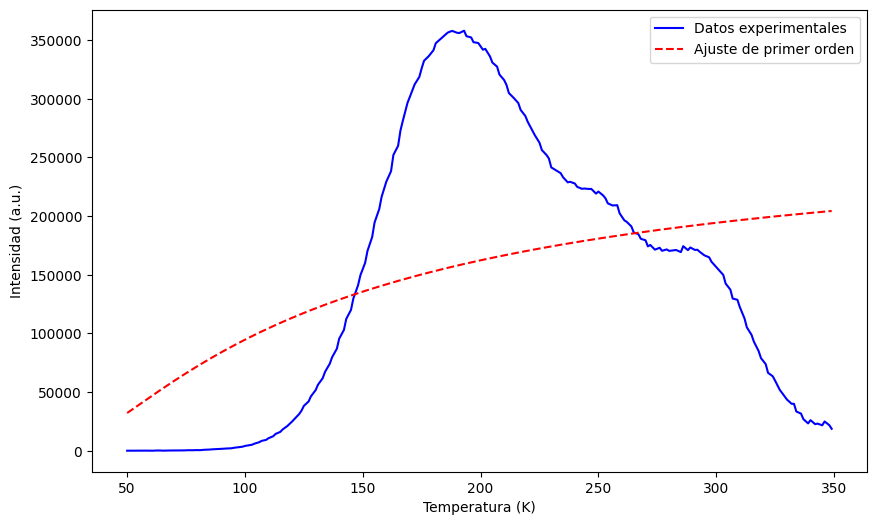

In [ ]:
# Vamos a simplificar el enfoque y ajustar una función de primer orden

# Definición de la función de primer orden sin parámetros adicionales complicados
def first_order_kinetics(T, I0, E, k=8.617e-5):
    return I0 * np.exp(-E / (k * T))

# Ajuste de la curva utilizando curve_fit con límites para evitar desbordamiento
popt, pcov = curve_fit(first_order_kinetics, temperature, xray, p0=[1e6, 0.5], bounds=(0, [1e10, 10]))

# Parámetros ajustados
I0_fit, E_fit = popt
print(f'Parámetros ajustados: I0 = {I0_fit}, E = {E_fit}')

# Curva ajustada
xray_fit = first_order_kinetics(temperature, I0_fit, E_fit)

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.plot(temperature, xray, 'b-', label='Datos experimentales')
plt.plot(temperature, xray_fit, 'r--', label='Ajuste de primer orden')
plt.xlabel('Temperatura (K)')
plt.ylabel('Intensidad (a.u.)')
plt.legend()
plt.show()

Parámetros ajustados:
Gaussiana 1: A = 336877.4322620079, T0 = 185.82702711597696, sigma = 28.803342109039786
Gaussiana 2: A = 24091.422932950896, T0 = 325.64042189944297, sigma = 24.477848894389865
Gaussiana 3: A = 187836.77756297035, T0 = 253.27995190559315, sigma = 32.15764922904197
Gaussiana 4: A = 78857.44554231607, T0 = 299.71945424924104, sigma = 14.6472994849884
R² = 0.9995879704330636
FOM = 0.011856075489566804


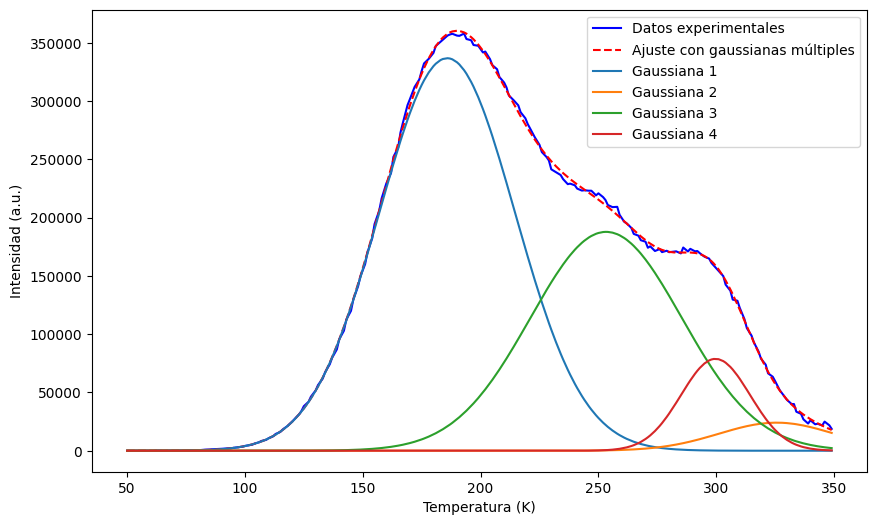

In [ ]:
# Vamos a utilizar un ajuste múltiple de funciones gaussianas

# Definición de una función gaussiana
def gaussian(T, A, T0, sigma):
    return A * np.exp(-(T - T0)**2 / (2 * sigma**2))

# Definición de una función con múltiples gaussianas
def multiple_gaussians(T, *params):
    n = len(params) // 3
    result = np.zeros_like(T, dtype=float)
    for i in range(n):
        A = params[3*i]
        T0 = params[3*i + 1]
        sigma = params[3*i + 2]
        result += gaussian(T, A, T0, sigma)
    return result

# Parámetros iniciales: amplitudes, posiciones y anchos de 5 gaussianas
initial_params = [1e4, 150, 10, 1e4, 200, 10, 1e4, 250, 10, 1e4, 300, 10]

# Ajuste de la curva utilizando curve_fit
popt, pcov = curve_fit(multiple_gaussians, temperature, xray, p0=initial_params, maxfev=10000)

# Parámetros ajustados
print('Parámetros ajustados:')
for i in range(len(popt) // 3):
    print(f'Gaussiana {i+1}: A = {popt[3*i]}, T0 = {popt[3*i + 1]}, sigma = {popt[3*i + 2]}')

# Curva ajustada
xray_fit = multiple_gaussians(temperature, *popt)

# Calcular R² (coeficiente de determinación)
r2 = r2_score(xray, xray_fit)

# Calcular el FOM (Figure of Merit)
fom = np.sum(np.abs(xray - xray_fit)) / np.sum(xray)

print(f'R² = {r2}')
print(f'FOM = {fom}')

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.plot(temperature, xray, 'b-', label='Datos experimentales')
plt.plot(temperature, xray_fit, 'r--', label='Ajuste con gaussianas múltiples')

# Graficar las gaussianas individuales
for i in range(len(popt) // 3):
    A = popt[3*i]
    T0 = popt[3*i + 1]
    sigma = popt[3*i + 2]
    plt.plot(temperature, gaussian(temperature, A, T0, sigma), label=f'Gaussiana {i+1}')

plt.xlabel('Temperatura (K)')
plt.ylabel('Intensidad (a.u.)')
plt.legend()
plt.show()

R² = 0.9996204402861735
FOM = 0.011633761093049123
Parámetros ajustados en la escala original:
Voigt 1: A = 17640.41360308471, T0 = 305.946069029217, sigma = 0.0018702457305333413, gamma = 19.730413022914615
Voigt 2: A = 79710.80794936442, T0 = 185.52860658190662, sigma = 28.583449702955356, gamma = 1.76071475007359e-15
Voigt 3: A = 49161.08633268292, T0 = 251.85955100379402, sigma = 32.50367953926752, gamma = 6.109640857946457e-07
Voigt 4: A = 2191.113732695267, T0 = 291.1856235980956, sigma = 8.660904358587926, gamma = 1.4938215942404374e-05
Voigt 5: A = 8.685654812222502e-11, T0 = 212.69376876281882, sigma = 266.8678633213679, gamma = 268.1398145303542


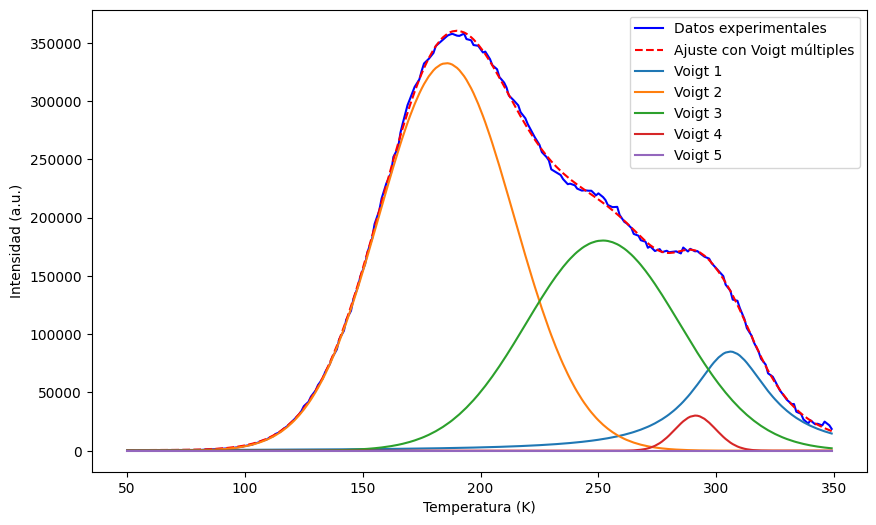

In [ ]:
# Deconvolución es el método de ajuste de picos Voigt

# Normalizar los datos de temperatura e intensidad
temperature_norm = (temperature - np.min(temperature)) / (np.max(temperature) - np.min(temperature))
xray_norm = xray / np.max(xray)

# Definición de una función Voigt
def voigt(T, A, T0, sigma, gamma):
    return A * np.real(wofz(((T - T0) + 1j*gamma) / sigma / np.sqrt(2))) / sigma / np.sqrt(2*np.pi)

# Definición de una función con múltiples Voigt
def multiple_voigt(T, *params):
    n = len(params) // 4
    result = np.zeros_like(T, dtype=float)
    for i in range(n):
        A = params[4*i]
        T0 = params[4*i + 1]
        sigma = params[4*i + 2]
        gamma = params[4*i + 3]
        result += voigt(T, A, T0, sigma, gamma)
    return result

# Parámetros iniciales: amplitudes, posiciones, sigma y gamma de 5 Voigt
initial_params = [0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.1, 0.1, 0.2, 0.6, 0.1, 0.1, 0.2, 0.8, 0.1, 0.1, 0.2, 1.0, 0.1, 0.1]

# Límites para los parámetros
param_bounds = ([0, 0, 0, 0] * 5, [1, 1, 1, 1] * 5)

# Ajuste de la curva utilizando curve_fit
popt, pcov = curve_fit(multiple_voigt, temperature_norm, xray_norm, p0=initial_params, bounds=param_bounds, maxfev=50000)

# Curva ajustada en la escala normalizada
xray_fit_norm = multiple_voigt(temperature_norm, *popt)
# Desnormalizar la curva ajustada a la escala original
xray_fit = xray_fit_norm * np.max(xray)

# Desnormalizar parámetros T0, sigma y gamma a la escala original de temperatura
T0_original = popt[1::4] * (np.max(temperature) - np.min(temperature)) + np.min(temperature)
sigma_original = popt[2::4] * (np.max(temperature) - np.min(temperature))
gamma_original = popt[3::4] * (np.max(temperature) - np.min(temperature))

# Calcular R² (coeficiente de determinación)
r2 = r2_score(xray, xray_fit)

# Calcular el FOM (Figure of Merit)
fom = np.sum(np.abs(xray - xray_fit)) / np.sum(xray)

print(f'R² = {r2}')
print(f'FOM = {fom}')

# Parámetros ajustados en la escala original
print('Parámetros ajustados en la escala original:')
for i in range(len(popt) // 4):
    print(f'Voigt {i+1}: A = {popt[4*i] * np.max(xray)}, T0 = {T0_original[i]}, sigma = {sigma_original[i]}, gamma = {gamma_original[i]}')

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.plot(temperature, xray, 'b-', label='Datos experimentales')
plt.plot(temperature, xray_fit, 'r--', label='Ajuste con Voigt múltiples')

# Graficar las curvas Voigt individuales en la escala original
for i in range(len(popt) // 4):
    A = popt[4*i] * np.max(xray)
    T0 = T0_original[i]
    sigma = sigma_original[i]
    gamma = gamma_original[i]
    voigt_curve = voigt(temperature_norm, popt[4*i], popt[4*i + 1], popt[4*i + 2], popt[4*i + 3]) * np.max(xray)
    plt.plot(temperature, voigt_curve, label=f'Voigt {i+1}')

plt.xlabel('Temperatura (K)')
plt.ylabel('Intensidad (a.u.)')
plt.legend()
plt.show()

R² = 0.9908394740436385
FOM = 0.06605314284792836
Parámetros ajustados en la escala normalizada:
Lorentziana 1: A = 0.5370820911519684, T0 = 0.5395571418310185, gamma = 0.068409147529699
Lorentziana 2: A = 0.42985832383005657, T0 = 0.38521235537228826, gamma = 0.049103198872664976
Lorentziana 3: A = 0.6023741988566982, T0 = 0.4569538306845711, gamma = 0.0540138643038752
Lorentziana 4: A = 0.40550205751785917, T0 = 0.671618007245152, gamma = 0.08503367094825648
Lorentziana 5: A = 0.33612809514329084, T0 = 0.8177939022352824, gamma = 0.06678743050678346


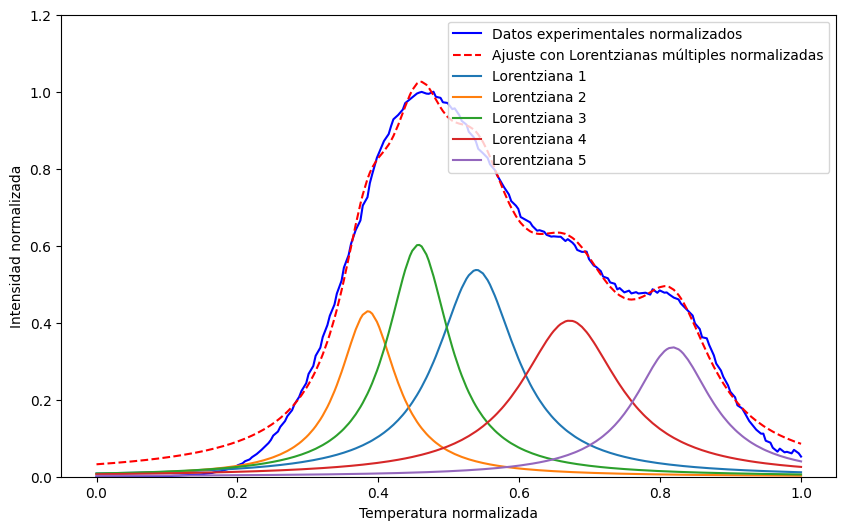

In [ ]:
# Ajuste de la curva con Lorentzianas

# Normalizar los datos de temperatura e intensidad
temperature_norm = (temperature - np.min(temperature)) / (np.max(temperature) - np.min(temperature))
xray_norm = xray / np.max(xray)

# Definición de una función Lorentziana
def lorentzian(T, A, T0, gamma):
    return A * (gamma**2 / ((T - T0)**2 + gamma**2))

# Definición de una función con múltiples Lorentzianas
def multiple_lorentzians(T, *params):
    n = len(params) // 3
    result = np.zeros_like(T, dtype=float)
    for i in range(n):
        A = params[3*i]
        T0 = params[3*i + 1]
        gamma = params[3*i + 2]
        result += lorentzian(T, A, T0, gamma)
    return result

# Parámetros iniciales: amplitudes, posiciones y anchos de 5 Lorentzianas
initial_params = [0.2, 0.2, 0.05, 0.2, 0.4, 0.05, 0.2, 0.6, 0.05, 0.2, 0.8, 0.05, 0.2, 1.0, 0.05]

# Límites para los parámetros
param_bounds = ([0, 0, 0] * 5, [1, 1, 0.1] * 5)

# Ajuste de la curva utilizando curve_fit
popt, pcov = curve_fit(multiple_lorentzians, temperature_norm, xray_norm, p0=initial_params, bounds=param_bounds, maxfev=50000)

# Curva ajustada en la escala normalizada
xray_fit_norm = multiple_lorentzians(temperature_norm, *popt)

# Calcular R² (coeficiente de determinación)
r2 = r2_score(xray_norm, xray_fit_norm)

# Calcular el FOM (Figure of Merit)
fom = np.sum(np.abs(xray_norm - xray_fit_norm)) / np.sum(xray_norm)

print(f'R² = {r2}')
print(f'FOM = {fom}')

# Parámetros ajustados en la escala normalizada
print('Parámetros ajustados en la escala normalizada:')
for i in range(len(popt) // 3):
    print(f'Lorentziana {i+1}: A = {popt[3*i]}, T0 = {popt[3*i + 1]}, gamma = {popt[3*i + 2]}')

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.plot(temperature_norm, xray_norm, 'b-', label='Datos experimentales normalizados')
plt.plot(temperature_norm, xray_fit_norm, 'r--', label='Ajuste con Lorentzianas múltiples normalizadas')

# Graficar las Lorentzianas individuales normalizadas
for i in range(len(popt) // 3):
    A = popt[3*i]
    T0 = popt[3*i + 1]
    gamma = popt[3*i + 2]
    plt.plot(temperature_norm, lorentzian(temperature_norm, A, T0, gamma), label=f'Lorentziana {i+1}')

plt.xlabel('Temperatura normalizada')
plt.ylabel('Intensidad normalizada')
plt.legend()
plt.ylim(0, 1.2)  # Ajuste de límites y valores adicionales para visualización
plt.show()

R² = -1.4791176101501033
FOM = 0.9999999999973974
Parámetros ajustados:
Pico 1: A = 100000.0, T0 = 185.82702711597696, E = 1.0, n = 1.0, b = 0.5
Pico 2: A = 100000.0, T0 = 325.64042189944297, E = 1.0, n = 1.5, b = 0.5
Pico 3: A = 100000.0, T0 = 253.27995190559315, E = 1.0, n = 1.0, b = 0.5
Pico 4: A = 100000.0, T0 = 299.71945424924104, E = 1.0, n = 1.5, b = 0.5


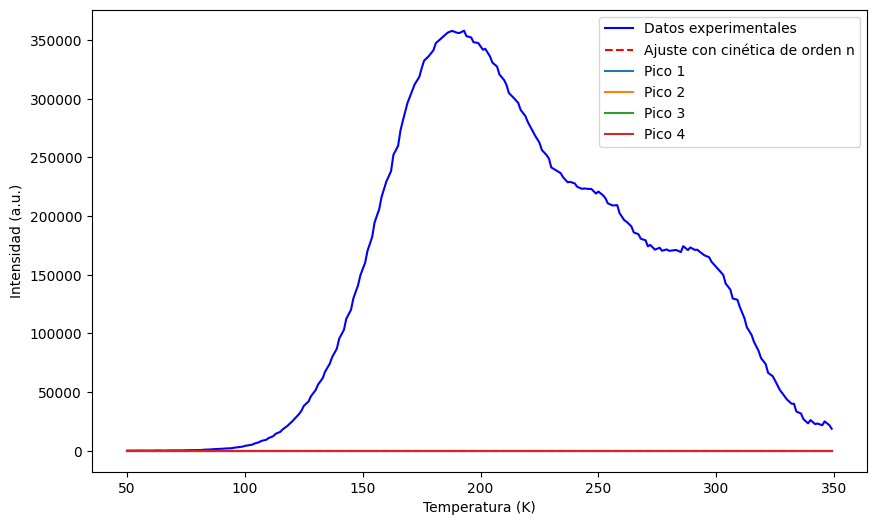

In [ ]:
# Cinética de orden n

# Definición de una función de cinética de orden n
def kinetics_n(T, A, T0, E, n, b):
    k = 8.617333262145e-5  # Constante de Boltzmann en eV/K
    term1 = (T ** n) * np.exp(-E / (k * T))
    term2 = (1 - (1 - b) * (T / T0))
    valid = (term2 > 0) & (T > 0)
    result = np.zeros_like(T)
    result[valid] = A * term1[valid] * (term2[valid] ** ((1 - n) / (1 - b)))
    return result

# Definición de una función con múltiples picos de cinética de orden n
def multiple_kinetics_n(T, *params):
    n = len(params) // 5
    result = np.zeros_like(T, dtype=float)
    for i in range(n):
        A = params[5*i]
        T0 = params[5*i + 1]
        E = params[5*i + 2]
        n_order = params[5*i + 3]
        b = params[5*i + 4]
        result += kinetics_n(T, A, T0, E, n_order, b)
    return result

# Definir una función de pérdida personalizada
def loss_function(params, T, xray):
    xray_fit = multiple_kinetics_n(T, *params)
    loss = np.sum((xray - xray_fit) ** 2)
    return loss


# Parámetros iniciales: amplitudes, posiciones, energías, órdenes y b de 4 picos de cinética de orden n
initial_params = [
    1e5, 185.82702711597696, 1.0, 1.0, 0.5,
    1e5, 325.64042189944297, 1.0, 1.5, 0.5,
    1e5, 253.27995190559315, 1.0, 1.0, 0.5,
    1e5, 299.71945424924104, 1.0, 1.5, 0.5
]

# Límites para los parámetros
param_bounds = [
    (0, np.inf), (0, np.inf), (0, 3), (0, 3), (0, 1),
    (0, np.inf), (0, np.inf), (0, 3), (0, 3), (0, 1),
    (0, np.inf), (0, np.inf), (0, 3), (0, 3), (0, 1),
    (0, np.inf), (0, np.inf), (0, 3), (0, 3), (0, 1)
]

# Optimización utilizando minimize
result = minimize(loss_function, initial_params, args=(temperature, xray), bounds=param_bounds, method='L-BFGS-B', options={'maxfun': 50000})

# Obtener parámetros ajustados
popt = result.x

# Curva ajustada
xray_fit = multiple_kinetics_n(temperature, *popt)

# Calcular R² (coeficiente de determinación)
ss_res = np.sum((xray - xray_fit) ** 2)
ss_tot = np.sum((xray - np.mean(xray)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Calcular el FOM (Figure of Merit)
fom = np.sum(np.abs(xray - xray_fit)) / np.sum(xray)

print(f'R² = {r2}')
print(f'FOM = {fom}')

# Parámetros ajustados
print('Parámetros ajustados:')
for i in range(len(popt) // 5):
    print(f'Pico {i+1}: A = {popt[5*i]}, T0 = {popt[5*i + 1]}, E = {popt[5*i + 2]}, n = {popt[5*i + 3]}, b = {popt[5*i + 4]}')

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.plot(temperature, xray, 'b-', label='Datos experimentales')
plt.plot(temperature, xray_fit, 'r--', label='Ajuste con cinética de orden n')

# Graficar las curvas individuales de cinética de orden n
for i in range(len(popt) // 5):
    A = popt[5*i]
    T0 = popt[5*i + 1]
    E = popt[5*i + 2]
    n_order = popt[5*i + 3]
    b = popt[5*i + 4]
    plt.plot(temperature, kinetics_n(temperature, A, T0, E, n_order, b), label=f'Pico {i+1}')

plt.xlabel('Temperatura (K)')
plt.ylabel('Intensidad (a.u.)')
plt.legend()
plt.show()

A = 358009.0
Tm = 193.0
E = 0.8
b = 0.5


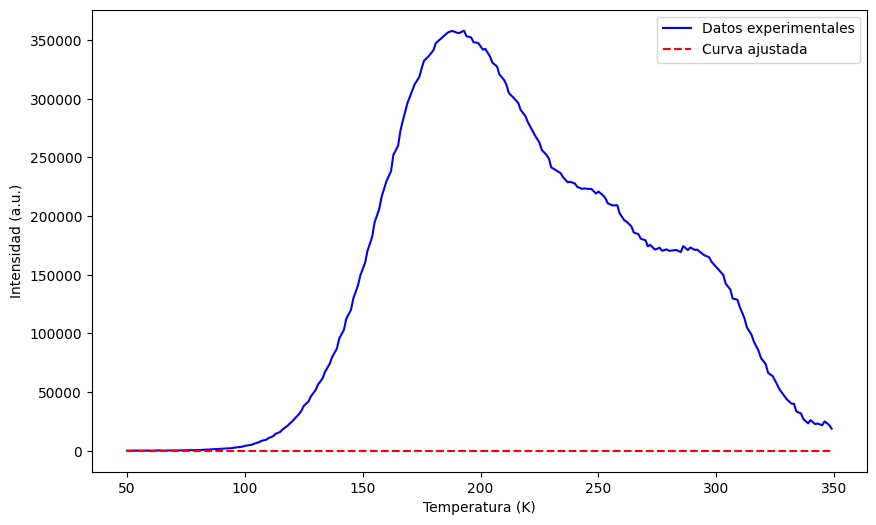

In [ ]:
# Define constants
k = 8.617333262145e-5  # Boltzmann constant in eV/K

# Definir la función de forma del pico
def peak_shape(T, A, Tm, E, b):
    term2 = 1 - (T / Tm)**b
    term2[term2 <= 0] = 1e-10  # Evitar valores inválidos
    return A * np.exp(-E / (k * T)) * (term2)**(1 - b)

# Ajustar los parámetros iniciales para mejorar la convergencia
initial_params = [max(xray), temperature[np.argmax(xray)], 0.8, 0.5]

# Ajustar la función de forma del pico a los datos
popt, pcov = curve_fit(peak_shape, temperature, xray, p0=initial_params, bounds=(0, np.inf))

# Extraer los parámetros ajustados
A, Tm, E, b = popt

# Calcular la curva ajustada
fitted_curve = peak_shape(temperature, *popt)

# Imprimir los parámetros ajustados
print(f'A = {A}')
print(f'Tm = {Tm}')
print(f'E = {E}')
print(f'b = {b}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(temperature, xray, 'b-', label='Datos experimentales')
plt.plot(temperature, fitted_curve, 'r--', label='Curva ajustada')
plt.xlabel('Temperatura (K)')
plt.ylabel('Intensidad (a.u.)')
plt.legend()
plt.show()


Activation Energy (E) = 0.144771198804036 eV


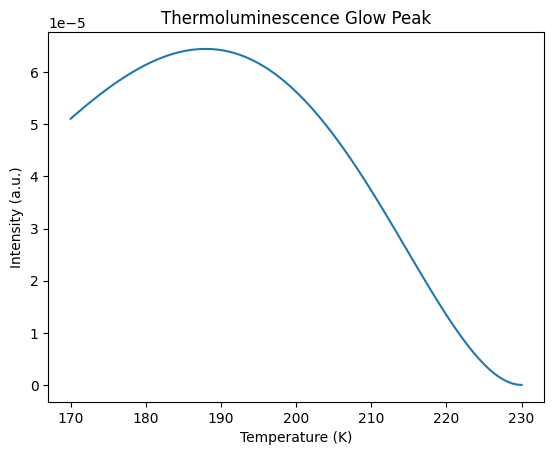

In [ ]:
# Example data for temperatures (replace with your actual data)
T1 = 170  # Temperature at half maximum on low-temperature side
Tm = 200  # Temperature at peak maximum
T2 = 230  # Temperature at half maximum on high-temperature side

# Calculate the half-widths and total width
tau = Tm - T1
delta = T2 - Tm
omega = T2 - T1

# Calculate the activation energy using Chen's equation for first-order kinetics
C = 2.52  # Constant for first-order kinetics
E = (C * k * Tm**2) / omega * (tau + delta) / omega

print(f'Activation Energy (E) = {E} eV')

# Plotting the peak shape for visualization
temperature = np.linspace(T1, T2, 100)
intensity = np.exp(-E / (k * temperature)) * (1 - ((temperature - T1) / (T2 - T1)))**2

plt.plot(temperature, intensity)
plt.xlabel('Temperature (K)')
plt.ylabel('Intensity (a.u.)')
plt.title('Thermoluminescence Glow Peak')
plt.show()